# Stock Valuation

This project aims to create a portfolio of stocks to buy. The priority is not to pick winning stocks, but to avoid picking losing stocks. I will aim to do this by assessing the value, growth, income and momentum of the companies in the US and UK stock market, and make a portfolio of these companies. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import requests
from IPython.display import display, clear_output
import time
from datetime import datetime
import logging

## Company Information

This code is a template for use later on when more company information is required to assess the value of a stock.

In [109]:
# Example stock symbol
stock_symbol = 'RELX'

# Create a Ticker object
ticker = yf.Ticker(stock_symbol)

# Get stock information
info = ticker.info

# Access specific metrics
ebitda = info.get('ebitda', None)
pe_ratio = info.get('trailingPE', None)  # P/E ratio
forward_pe = info.get('forwardPE', None)  # Forward P/E ratio
peg_ratio = info.get('pegRatio', None)  # PEG ratio
price_to_book = info.get('priceToBook', None)  # Price/Book ratio
trailing_eps = info.get('trailingEps', None)  # Trailing 12-month EPS
forward_eps = info.get('forwardEps', None) 
enterprise_to_revenue = info.get('enterpriseToRevenue', None)  # Enterprise Value/Revenue
enterprise_to_ebitda = info.get('enterpriseToEbitda', None)  # Enterprise Value/EBITDA
beta = info.get('beta', None)

# Cash flow data is not directly available through the `info` attribute. 
# You need to use `cashflow` for the cash flow statement:
cash_flow_statement = ticker.cashflow

# Print the metrics
print(f"Stock: {stock_symbol}")
print(f"EBITDA: {ebitda}")
print(f"P/E Ratio: {pe_ratio}")
print(f"Forward P/E Ratio: {forward_pe}")
print(f"PEG Ratio: {peg_ratio}")
print(f"Trailing EPS: {trailing_eps}")
print(f"Forward EPS: {forward_eps}")
print(f"Price to Book Ratio: {price_to_book}")
#print(f"Enterprise to Revenue: {enterprise_to_revenue}")
#print(f"Enterprise to EBITDA: {enterprise_to_ebitda}")
print(f"Beta: {beta}")
print("\nCash Flow Statement (Annual):")
print(cash_flow_statement)

# Note: The cash flow statement provided here is annual by default. 
# You can get quarterly data by passing `quarterly=True` to `cashflow`.

Stock: RELX
EBITDA: 2894000128
P/E Ratio: 35.102566
Forward P/E Ratio: 37.33636
PEG Ratio: None
Trailing EPS: 1.17
Forward EPS: 1.1
Price to Book Ratio: 22.33279
Beta: 0.457

Cash Flow Statement (Annual):
                                         2023-12-31    2022-12-31  \
Free Cash Flow                         1980000000.0  1965000000.0   
Repurchase Of Capital Stock            -850000000.0  -550000000.0   
Repayment Of Debt                      -847000000.0   -35000000.0   
Issuance Of Debt                        651000000.0   397000000.0   
Issuance Of Capital Stock                41000000.0    26000000.0   
Capital Expenditure                    -477000000.0  -436000000.0   
End Cash Position                       155000000.0   334000000.0   
Beginning Cash Position                 334000000.0   113000000.0   
Effect Of Exchange Rate Changes         -10000000.0    13000000.0   
Changes In Cash                        -169000000.0   208000000.0   
Financing Cash Flow                 

In [104]:
# Adjust display settings to show more rows
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # Show all columns

ticker.get_balance_sheet()

2023-12-31  \
TreasurySharesNumber                                   25400000.0   
OrdinarySharesNumber                                 1881500000.0   
ShareIssued                                          1906900000.0   
NetDebt                                              6201000000.0   
TotalDebt                                            6497000000.0   
TangibleBookValue                                   -7801000000.0   
InvestedCapital                                      9816000000.0   
WorkingCapital                                      -2616000000.0   
NetTangibleAssets                                   -7801000000.0   
CapitalLeaseObligations                               141000000.0   
CommonStockEquity                                    3460000000.0   
TotalCapitalization                                  8560000000.0   
TotalEquityGrossMinorityInterest                     3439000000.0   
MinorityInterest                                      -21000000.0   
StockholdersEquity                                   3460000000.0   
TreasuryStock                                         553000000.0   
AdditionalPaidInCapital                              1558000000.0   
CapitalStock                                          275000000.0   
CommonStock                                           275000000.0   
TotalLiabilitiesNetMinorityInterest                 11478000000.0   
TotalNonCurrentLiabilitiesNetMinorityInterest        5988000000.0   
DerivativeProductLiabilities                          131000000.0   
NonCurrentPensionAndOtherPostretirementBenefitP...    182000000.0   
TradeandOtherPayablesNonCurrent                        11000000.0   
NonCurrentDeferredTaxesLiabilities                    473000000.0   
LongTermDebtAndCapitalLeaseObligation                5184000000.0   
LongTermCapitalLeaseObligation                         84000000.0   
LongTermDebt                                         5100000000.0   
LongTermProvisions                                      7000000.0   
CurrentLiabilities                                   5490000000.0   
CurrentDebtAndCapitalLeaseObligation                 1313000000.0   
CurrentCapitalLeaseObligation                          57000000.0   
CurrentDebt                                          1256000000.0   
CurrentProvisions                                      13000000.0   
Payables                                              995000000.0   
OtherPayable                                          487000000.0   
TotalTaxPayable                                       337000000.0   
AccountsPayable                                       171000000.0   
TotalAssets                                         14917000000.0   
TotalNonCurrentAssets                               12043000000.0   
DefinedPensionBenefit                                 119000000.0   
NonCurrentDeferredTaxesAssets                         128000000.0   
FinancialAssets                                        47000000.0   
OtherInvestments                                              NaN   
InvestmentinFinancialAssets                                   NaN   
TradingSecurities                                             NaN   
LongTermEquityInvestment                              275000000.0   
InvestmentsinJointVenturesatCost                      178000000.0   
InvestmentsInOtherVenturesUnderEquityMethod            97000000.0   
GoodwillAndOtherIntangibleAssets                    11261000000.0   
OtherIntangibleAssets                                3238000000.0   
Goodwill                                             8023000000.0   
NetPPE                                                212000000.0   
AccumulatedDepreciation                              -408000000.0   
GrossPPE                                              620000000.0   
OtherProperties                                       113000000.0   
MachineryFurnitureEquipment                           373000000.0   
LandAndImprovements                                  

In [113]:
def calculate_croci(ticker):
    stock = yf.Ticker(ticker)
    info = stock.get_info()
    balance_sheet = stock.get_balance_sheet()

    try:
        ebitda = info.get('ebitda')  # Most recent year's EBITDA
        total_equity = balance_sheet.loc['StockholdersEquity'].iloc[0]  # Total equity

        croci = ebitda / total_equity
        return croci * 100  # Convert to percentage
    except KeyError as e:
        print(f"Data missing for {e}")
        return None

# Example usage
ticker_symbol = 'TSLA'
croci_percentage = calculate_croci(ticker_symbol)
if croci_percentage is not None:
    print(f"CROCI % (EBITDA/Total Equity) for {ticker_symbol}: {croci_percentage:.2f}%")
else:
    print("CROCI calculation not possible due to missing data.")

CROCI % (EBITDA/Total Equity) for TSLA: 21.65%


In [4]:
logging.basicConfig(level=logging.ERROR)  # Suppress yfinance messages

def calculate_alpha(stock_symbol, benchmark_symbol, risk_free_rate, start_date, end_date):
    try:
        stock_data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)
        benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date, progress=False)

        if stock_data.empty or benchmark_data.empty:
            return np.nan

        stock_returns = stock_data['Adj Close'].pct_change().dropna()
        benchmark_returns = benchmark_data['Adj Close'].pct_change().dropna()

        if stock_returns.std() * np.sqrt(252) > 1:  # Check if annualized volatility is unusually high
            return np.nan  # Consider handling or flagging this differently

        covariance_matrix = np.cov(stock_returns, benchmark_returns)
        beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
        expected_returns = risk_free_rate + beta * (benchmark_returns.mean() * 252 - risk_free_rate)
        actual_returns = (1 + stock_returns.mean())**252 - 1
        alpha = actual_returns - expected_returns

        return round(alpha * 100, 2)
    except Exception:
        return np.nan

# Example usage:
alpha_value = calculate_alpha('BRK-A', '^GSPC', 0.035, '2022-04-19', datetime.now().strftime('%Y-%m-%d'))
print(f"Alpha: {alpha_value if alpha_value is not np.nan else 'N/A'}")

Alpha: 3.65


# Value Analysis

### Information Technology Sector

In [5]:
df = pd.read_csv('us_stock_data.csv')

In [6]:
import numpy as np

def fetch_metrics(tickers):
    unique_tickers = list(set(tickers))
    metrics = {
        'symbol': [],
        'Market Cap': [],
        'Trailing P/E': [],
        'P/B Ratio': [],
        'Trailing EPS': [],
        'Forward P/E': [],
        #'Forward EPS': [],
        #'PEG Ratio': [],
        'Graham Metric': [],
        'Dividend Yield %': [],
        'Beta': [],
        'Alpha %': [],
        'Financial Currency': []
    }
    for ticker in unique_tickers:
        info = yf.Ticker(ticker).info
        trailingPE = float(info.get('trailingPE', np.nan))
        PB_ratio = float(info.get('priceToBook', np.nan))
        
        metrics['symbol'].append(ticker)
        metrics['Market Cap'].append(float(info.get('marketCap', np.nan)))
        metrics['Trailing P/E'].append(trailingPE)
        metrics['P/B Ratio'].append(PB_ratio)
        metrics['Trailing EPS'].append(float(info.get('trailingEps', np.nan)))
        metrics['Forward P/E'].append(float(info.get('forwardPE', np.nan)))
        #metrics['Forward EPS'].append(float(info.get('forwardEps', np.nan)))
        #metrics['PEG Ratio'].append(float(info.get('peg_ratio', np.nan)))
        metrics['Graham Metric'].append(trailingPE * PB_ratio)
        metrics['Dividend Yield %'].append(float(info.get('dividendYield', np.nan)) * 100 if info.get('dividendYield') is not None else np.nan)
        metrics['Beta'].append(float(info.get('beta', np.nan)))
        metrics['Alpha %'].append(calculate_alpha(ticker, '^GSPC', 0.035, '2022-04-19', datetime.now().strftime('%Y-%m-%d')))
        metrics['Financial Currency'].append(info.get('financialCurrency', np.nan))
    return pd.DataFrame(metrics)


def graham_valuation(stock_metrics):
    """Determines if a stock meets Benjamin Graham's criteria for investment."""
    valuation_status = {}
    for index, row in stock_metrics.iterrows():
        meets_criteria = True
        # Check Graham's criteria
        if row['Trailing P/E'] >= 15 or row['Trailing P/E'] * row['P/B Ratio'] >= 22.5:
            meets_criteria = False
        #if row['Current_Ratio'] < 2 or row['Debt_to_Equity'] >= 1:
        #    meets_criteria = False
        # EPS Growth and Dividend Yield can be considered based on availability and specific criteria
        
        valuation_status[row.name] = "Undervalued" if meets_criteria else "Not Undervalued"
    
    return valuation_status

def calculate_benchmarks(df):
    """Calculates benchmarks (median) for a DataFrame of financial metrics."""
    # Select only numeric columns for the median calculation
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.median().to_dict()

def compare_stock_to_benchmarks(stock_metrics, sp500_benchmarks, sector_benchmarks):
    """Compares a single stock's metrics to S&P 500 and sector benchmarks."""
    comparison = {}
    for metric in stock_metrics.index:
        comparison[metric] = {
            'Stock': stock_metrics[metric],
            'S&P 500 Median': sp500_benchmarks.get(metric, np.nan),
            'Sector Median': sector_benchmarks.get(metric, np.nan),
        }
    return comparison

In [7]:
def sector_valuation_status(value, metric, sector_benchmarks):
    """Determines valuation status of a stock based on sector medians for specific metrics."""
    # Define a list of metrics to evaluate
    metrics_to_evaluate = ['Trailing P/E', 'Forward P/E', 'P/B Ratio']
    
    # Check if the metric is one of the specified metrics for comparison
    if metric in sector_benchmarks and metric in metrics_to_evaluate:
        median = sector_benchmarks[metric]
        if value < median * 0.8:
            return 'Undervalued'
        elif value > median * 1.2:
            return 'Overvalued'
        else:
            return 'Fair Value'
    return 'N/A'  # Return 'N/A' for metrics not specified for evaluation

In [8]:
def graham_valuation_status(stock_metrics):
    """Evaluates if a stock meets Benjamin Graham's investment criteria with transition ranges."""
    status = {}

    # Attempt to convert to float, use inf if conversion fails
    try:
        pe_ratio = float(stock_metrics.get('Trailing P/E', float('inf')))
    except ValueError:
        pe_ratio = float('inf')

    try:
        pb_ratio = float(stock_metrics.get('P/B Ratio', float('inf')))
    except ValueError:
        pb_ratio = float('inf')

    # Evaluate P/E Ratio
    if pe_ratio < 15:
        status['Trailing P/E'] = 'Undervalued'
    elif 15 <= pe_ratio <= 20:
        status['Trailing P/E'] = 'Fair Value'
    else:
        status['Trailing P/E'] = 'Overvalued'

    # Evaluate P/B Ratio
    if pb_ratio < 1.5:
        status['P/B Ratio'] = 'Undervalued'
    elif 1.5 <= pb_ratio <= 2:
        status['P/B Ratio'] = 'Fair Value'
    else:
        status['P/B Ratio'] = 'Overvalued'

    # Combined P/E * P/B criterion, introducing a range for transition
    combined_value = pe_ratio * pb_ratio
    if combined_value < 22.5:
        status['Combined P/E x P/B'] = 'Undervalued'
    elif 22.5 <= combined_value <= 27:
        status['Combined P/E x P/B'] = 'Fair Value'
    else:
        status['Combined P/E x P/B'] = 'Overvalued'

    return status

In [9]:
def plot_table_colored(df):
    # Adjust the figure size here (width, height) to make the table bigger
    fig, ax = plt.subplots(figsize=(20, len(df) * 0.5))  # Adding +2 for a bit more space
    ax.axis('tight')
    ax.axis('off')
    
    # Use a larger font size for readability
    plt.rcParams.update({'font.size': 10})
    
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.1 for _ in df.columns])  # Adjust column widths as necessary
    
    # Apply coloring based on valuation status
    for i, col in enumerate(df.columns):
        for j, _ in enumerate(df.index):
            cell_text = table[(j+1, i)].get_text().get_text()
            if "Graham Status" in col:
                # Use one color scheme for Graham-based valuation
                if "Undervalued" in cell_text:
                    table[(j+1, i)].set_facecolor('green')  # Light blue
                elif "Overvalued" in cell_text:
                    table[(j+1, i)].set_facecolor('red')  # Light coral
                elif "Fair Value" in cell_text:
                    table[(j+1, i)].set_facecolor('orange')  # Light green
            elif "Sector Status" in col:
                # Use a different color scheme for sector-based valuation
                if "Undervalued" in cell_text:
                    table[(j+1, i)].set_facecolor('#006400')  # Dark green
                    table[(j+1, i)].set_text_props(color='w')
                elif "Overvalued" in cell_text:
                    table[(j+1, i)].set_facecolor('#8b0000')  # Dark red
                    table[(j+1, i)].set_text_props(color='w')
                elif "Fair Value" in cell_text:
                    table[(j+1, i)].set_facecolor('#808080')  # Grey
                    table[(j+1, i)].set_text_props(color='w')
            else:
                # Neutral color for non-valued cells
                table[(j+1, i)].set_facecolor('#f5f5f5')
    
    plt.tight_layout()
    plt.show()

In [10]:
# Extract unique sectors from the 'GICS Sector' column
unique_sectors = df['sector'].unique()

# Convert the array of unique sectors to a list
sector_list = unique_sectors.tolist()

# Print the list of sectors
print(sector_list)

['Healthcare', 'Basic Materials', 'Consumer Defensive', 'Financial Services', 'Industrials', 'Technology', 'Consumer Cyclical', 'Real Estate', 'Energy', 'Communication Services', 'Utilities']


In [11]:
def process_sector(sector_name, df):
    print(f"Processing sector: {sector_name}")
    sector_companies = df[df['sector'] == sector_name]['symbol'].tolist()
    sector_data = fetch_metrics(sector_companies)
    sector_benchmarks = calculate_benchmarks(sector_data)
    
    results = []
    for _, metrics in sector_data.iterrows():
        graham_status = graham_valuation_status(metrics)
        
        # Applying sector valuation status only to specific metrics
        sector_status = {metric: sector_valuation_status(metrics[metric], metric, sector_benchmarks) 
                         for metric in ['Trailing P/E', 'Forward P/E', 'P/B Ratio'] if metric in metrics}
        
        row = {
            'Ticker': metrics['symbol'],  # Assuming 'symbol' is part of the metrics DataFrame
            **metrics,
            **{f'{metric} Graham Status': status for metric, status in graham_status.items()},
            **{f'{metric} Sector Status': status for metric, status in sector_status.items()}
        }
        results.append(row)

    df_results = pd.DataFrame(results)

    return df_results, len(sector_companies) 

In [12]:
def main_process(df):
    unique_sectors = df['sector'].unique()
    total_sectors = len(unique_sectors)
    processed_count = 0
    start_time = time.time()
    
    sector_results_dict = {}

    for sector in unique_sectors:
        df_sector_results, num_stocks = process_sector(sector, df)
        sector_results_dict[sector] = df_sector_results
        
        processed_count += 1
        stocks_remaining = sum(df[df['sector'] == s]['symbol'].count() for s in unique_sectors[processed_count:])  # Calculate remaining stocks

        # Dynamic update of the progress
        clear_output(wait=True)
        display(f"Processed {processed_count}/{total_sectors} sectors. ({processed_count/total_sectors * 100:.2f}%) - "
                f"Total stocks processed in current sector: {num_stocks}")

    print("All sectors processed successfully.")
    return sector_results_dict

# Example usage assuming 'df' is your DataFrame loaded with stock data including sectors
sector_results = main_process(df)

'Processed 11/11 sectors. (100.00%) - Total stocks processed in current sector: 100'

All sectors processed successfully.


In [13]:
# Initialize the dictionary to store undervalued stocks by sector
undervalued_stocks_by_sector = {}

# Initialize an empty DataFrame to store results from all sectors
all_sectors_df = pd.DataFrame()

for sector in unique_sectors:
    # Access the pre-processed DataFrame for each sector from sector_results_dict
    df_sector_results = sector_results.get(sector, pd.DataFrame())

    if not df_sector_results.empty:
        # Extract tickers of undervalued stocks based on the "Combined P/E x P/B Graham Status"
        undervalued_stocks = df_sector_results[df_sector_results['Combined P/E x P/B Graham Status'] == 'Undervalued'].copy()
        
        # Add sector information to each row safely using .loc
        undervalued_stocks.loc[:, 'sector'] = sector
        
        # Append the undervalued stocks of the current sector to the all_sectors_df DataFrame
        all_sectors_df = pd.concat([all_sectors_df, undervalued_stocks], ignore_index=True)
    
        # Calculate and print the number of undervalued stocks per sector
        undervalued_stocks_by_sector[sector] = undervalued_stocks['Ticker'].tolist()
        print(f'Sector: {sector} - Undervalued stocks: {len(undervalued_stocks_by_sector[sector])} ({100*len(undervalued_stocks_by_sector[sector])/len(df_sector_results):.1f}%)')

# Save the consolidated DataFrame to CSV
all_sectors_df.to_csv('undervalued_stocks_by_sector.csv', index=False)

Sector: Healthcare - Undervalued stocks: 33 (2.8%)
Sector: Basic Materials - Undervalued stocks: 42 (19.4%)
Sector: Consumer Defensive - Undervalued stocks: 45 (19.1%)
Sector: Financial Services - Undervalued stocks: 448 (46.5%)
Sector: Industrials - Undervalued stocks: 88 (14.1%)
Sector: Technology - Undervalued stocks: 56 (7.4%)
Sector: Consumer Cyclical - Undervalued stocks: 99 (17.7%)
Sector: Real Estate - Undervalued stocks: 48 (19.4%)
Sector: Energy - Undervalued stocks: 97 (44.5%)
Sector: Communication Services - Undervalued stocks: 41 (16.7%)
Sector: Utilities - Undervalued stocks: 21 (21.0%)


In [27]:
#all_sectors_df[all_sectors_df['sector'] == 'Technology'].sort_values(by='P/B Ratio', ascending=True)

filtered_df = all_sectors_df[(all_sectors_df['Forward P/E'] >= 0) & (all_sectors_df['Alpha %'] > 1.5) & (all_sectors_df['Financial Currency'] == 'USD')]
sorted_filtered_df = filtered_df.sort_values(by='Forward P/E', ascending=True)
sorted_filtered_df

Ticker symbol    Market Cap  Trailing P/E  P/B Ratio  Trailing EPS  \
907    TNP    TNP  7.293784e+08      2.162730   0.441342         11.43   
952   DLNG   DLNG  1.207112e+08      4.823529   0.375802          0.68   
615    NMM    NMM  1.247521e+09      2.935370   0.459580         14.08   
861    PXS    PXS  4.860574e+07      1.574830   0.505624          2.94   
256    JXN    JXN  4.995715e+09      6.059479   0.532184         10.76   
..     ...    ...           ...           ...        ...           ...   
909   GEOS   GEOS  1.665969e+08      6.689840   1.138722          1.87   
584   WLFC   WLFC  3.189627e+08      8.008025   0.778412          6.23   
647   CVEO   CVEO  3.759956e+08     12.761194   1.176066          2.01   
964   VEON   VEON  1.767786e+09      3.411428   1.558645          7.00   
783    HOV    HOV  8.275340e+08      4.733284   1.682989         27.52   

     Forward P/E  Forward EPS  PEG Ratio  Graham Metric  ...   Beta  Alpha %  \
907     2.496970         9.90        NaN       0.954503  ... -0.146    57.73   
952     2.688525         1.22        NaN       1.812692  ...  1.574     7.48   
615     2.764549        14.95        NaN       1.349036  ...  1.997    13.78   
861     3.507576         1.32        NaN       0.796272  ...  0.037    50.73   
256     3.664980        17.79        NaN       3.224758  ...  1.579    25.58   
..           ...          ...        ...            ...  ...    ...      ...   
909    31.275000         0.40        NaN       7.617869  ...  0.783    63.50   
584    39.912000         1.25        NaN       6.233544  ...  0.991    26.33   
647    53.437500         0.48        NaN      15.008006  ...  2.200     1.56   
964    62.842102         0.38        NaN       5.317206  ...  1.649    50.27   
783   180.916660         0.72        NaN       7.966066  ...  2.618    86.40   

     Financial Currency Trailing P/E Graham Status P/B Ratio Graham Status  \
907                 USD                Undervalued             Undervalued   
952                 USD                Undervalued             Undervalued   
615                 USD                Undervalued             Undervalued   
861                 USD                Undervalued             Undervalued   
256                 USD                Undervalued             Undervalued   
..                  ...                        ...                     ...   
909                 USD                Undervalued             Undervalued   
584                 USD                Undervalued             Undervalued   
647                 USD                Undervalued             Undervalued   
964                 USD                Undervalued              Fair Value   
783                 USD                Undervalued              Fair Value   

    Combined P/E x P/B Graham Status Trailing P/E Sector Status  \
907                      Undervalued                Undervalued   
952                      Undervalued                Undervalued   
615                      Undervalued                Undervalued   
861                      Undervalued                Undervalued   
256                      Undervalued                Undervalued   
..                               ...                        ...   
909                      Undervalued                Undervalued   
584                      Undervalued                Undervalued   
647                      Undervalued                Undervalued   
964                      Undervalued                Undervalued   
783                      Undervalued                Undervalued   

    Forward P/E Sector Status P/B Ratio Sector Status                  sector  
907               Undervalued             Undervalued                  Energy  
952               Undervalued             Undervalued                  Energy  
615               Undervalued             Undervalued             Industrials  
861               Undervalued             Undervalued                  Energy  
256         

In [15]:
def plot_valuation_table(df):
    print(f"Valuation Table")
    columns_to_display = ['symbol'] + [col for col in df.columns if 'Status' in col]
    plot_table_colored(df[columns_to_display])

def plot_sector_valuation_table(df, sector_name):
    print(f"Valuation Table for {sector_name} Sector")
    # Filter the DataFrame for the given sector
    sector_df = df[df['sector'] == sector_name]
    
    # Select columns that include 'Status' in their names plus the 'symbol' column
    columns_to_display = ['symbol'] + [col for col in sector_df.columns if 'Status' in col]
    
    # Plot the table with the filtered DataFrame
    plot_table_colored(sector_df[columns_to_display])

In [28]:
#plot_valuation_table(all_sectors_df)

In [17]:
def plot_pe_ratios(df, sector_name):
    plt.figure(figsize=(14, 7))
    plt.title(f'P/E Ratios for {sector_name} Sector')
    plt.xlabel('Company Ticker')
    plt.ylabel('Trailing P/E Ratio')

    # Determine colors based on valuation status
    colors = df['Combined P/E x P/B Graham Status'].map({
        'Undervalued': 'green',
        'Fair Value': 'orange',
        'Overvalued': 'red',
        'N/A': 'gray'
    })

    # Plot each company's P/E ratio
    plt.scatter(df['Ticker'], df['Trailing P/E'], color=colors, alpha=0.7, s=100)

    # Optional: Add sector median P/E ratio line
    sector_median_pe = df['Trailing P/E'].median()
    plt.axhline(y=sector_median_pe, color='blue', linestyle='--', label=f'Sector Median P/E: {sector_median_pe:.2f}')

    plt.xticks(rotation=90)  # Rotate company tickers for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()

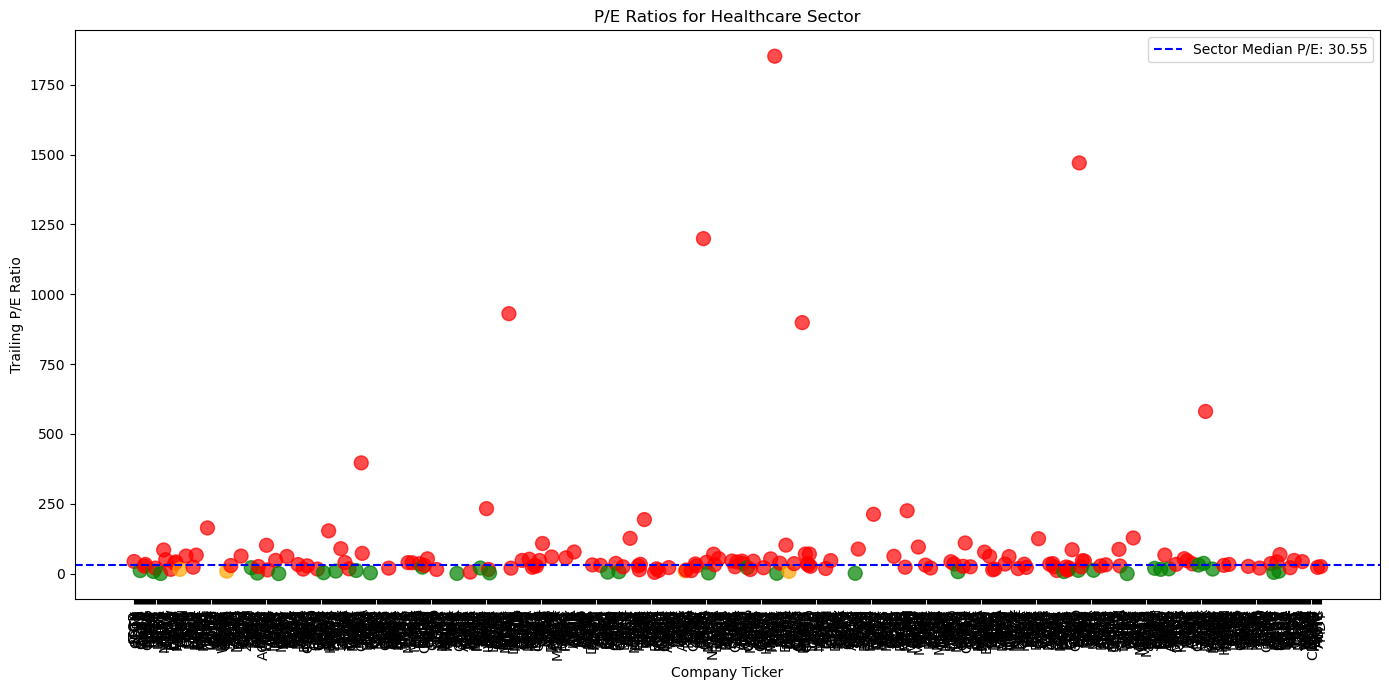

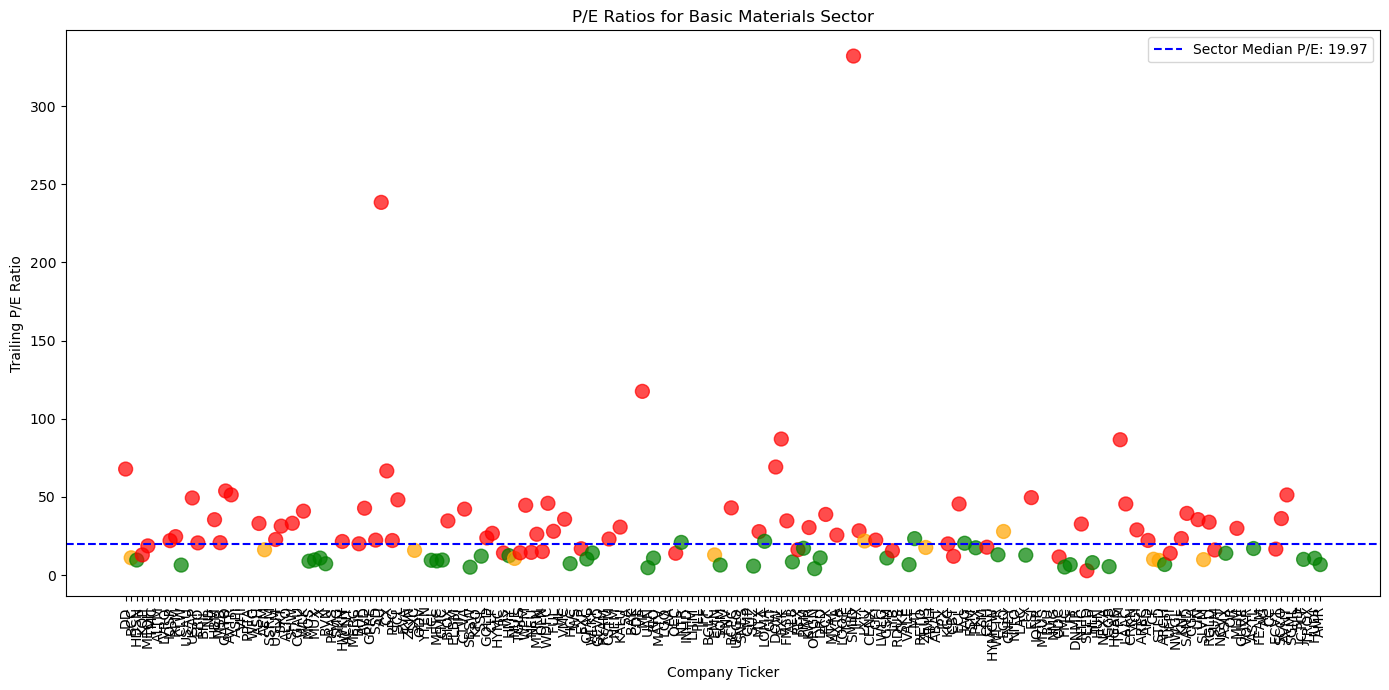

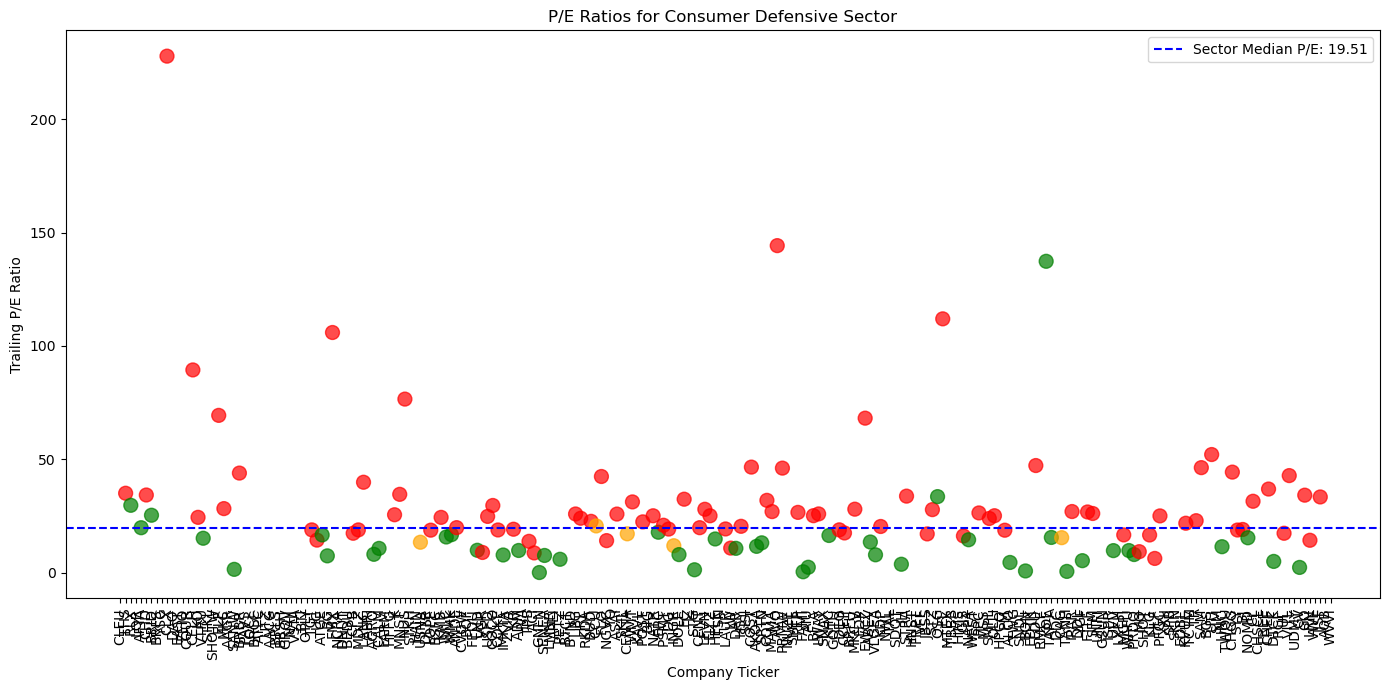

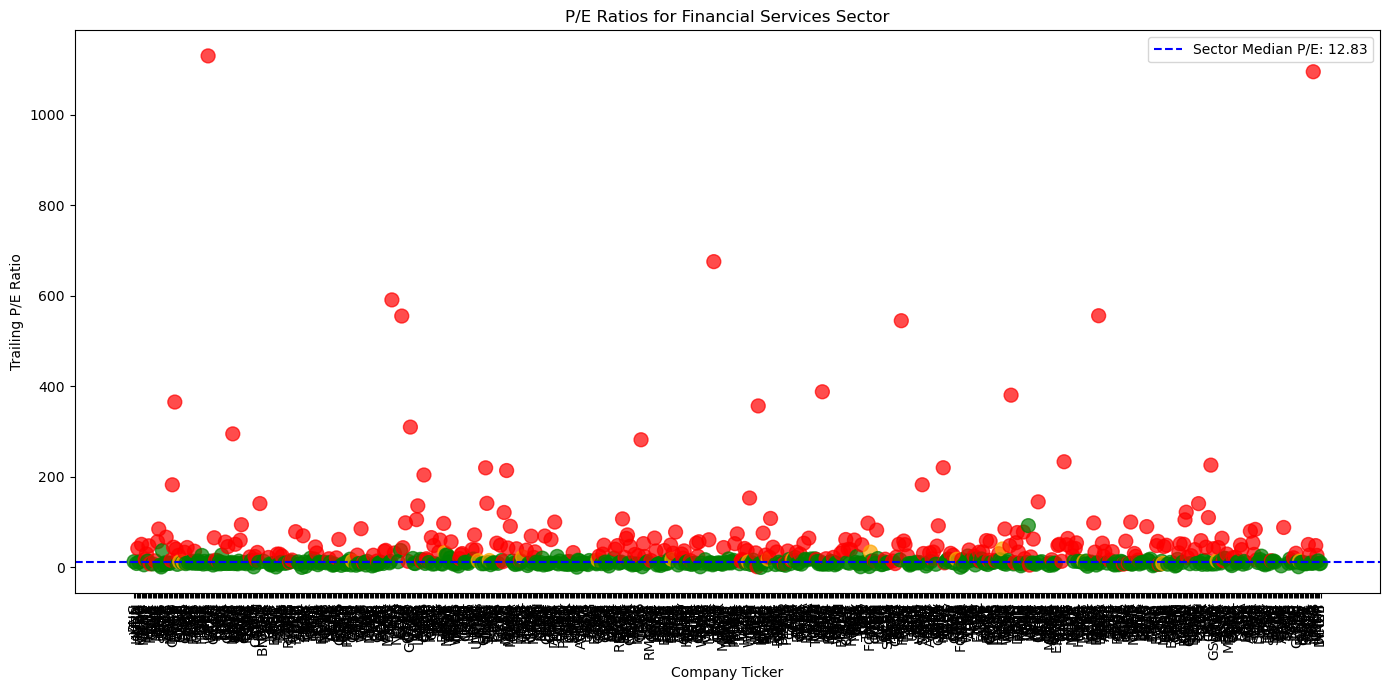

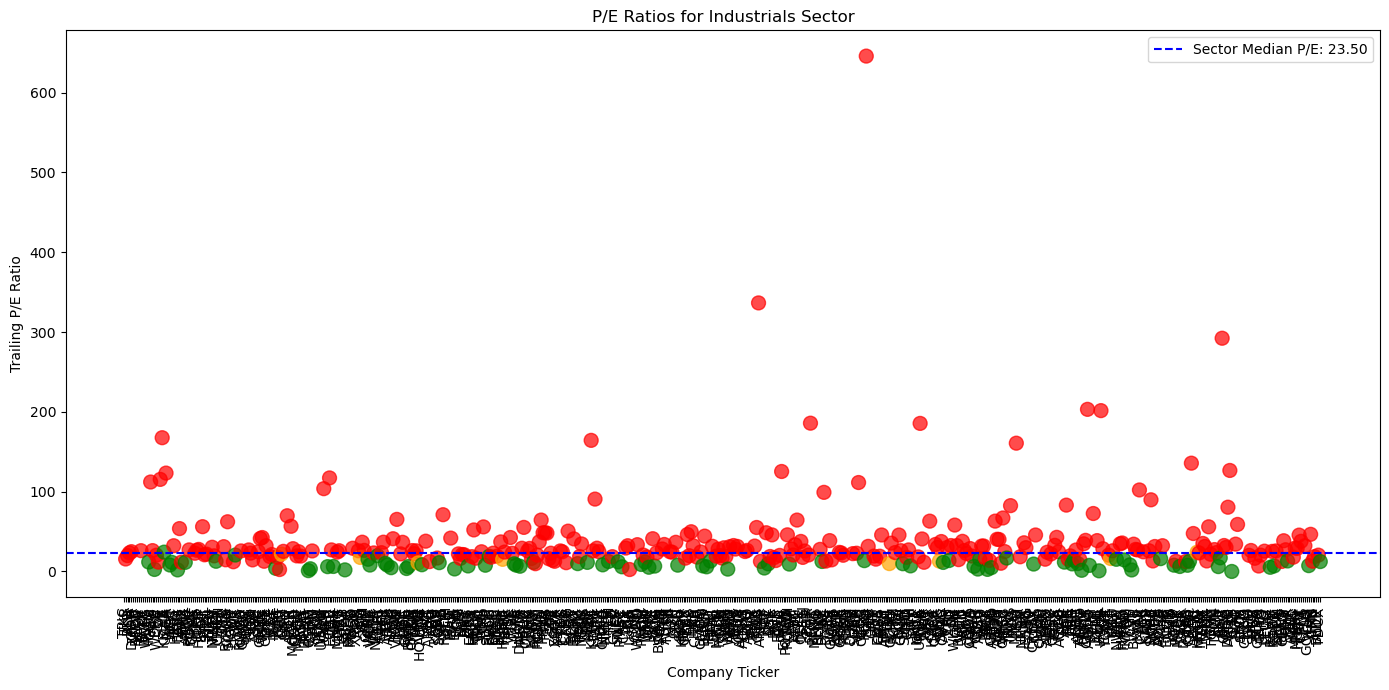

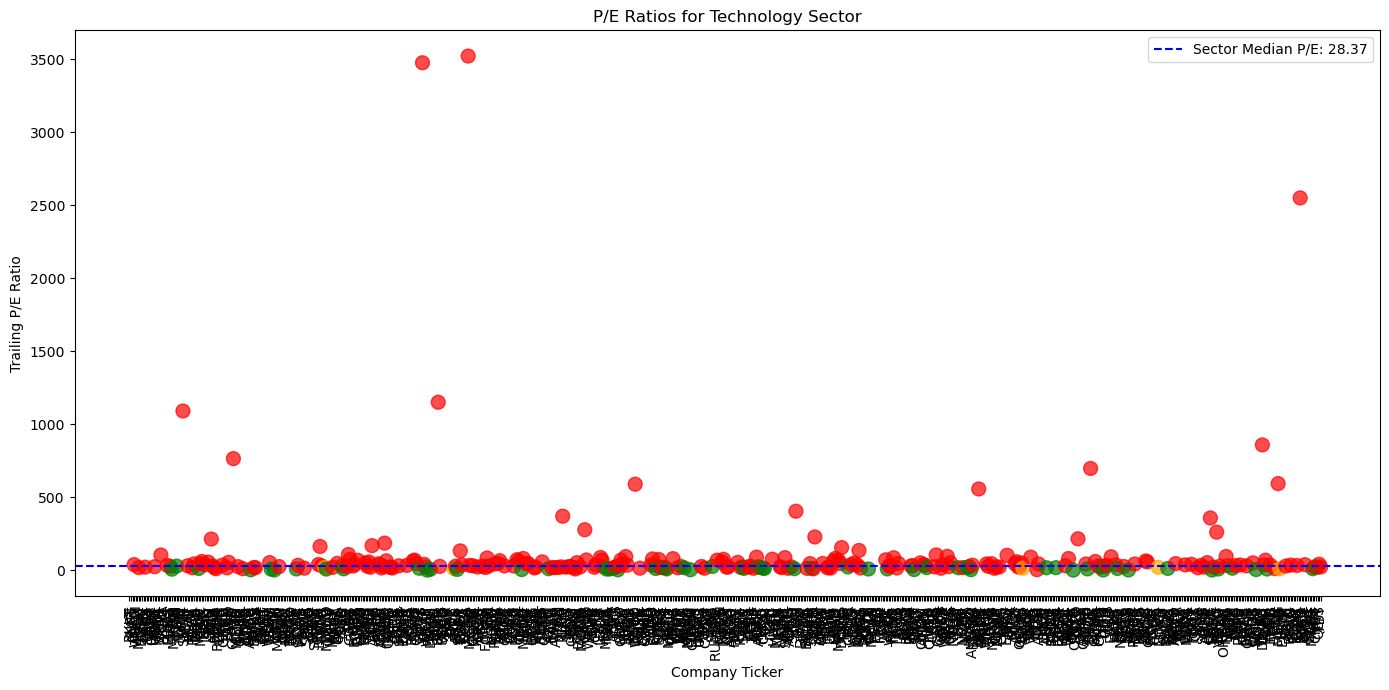

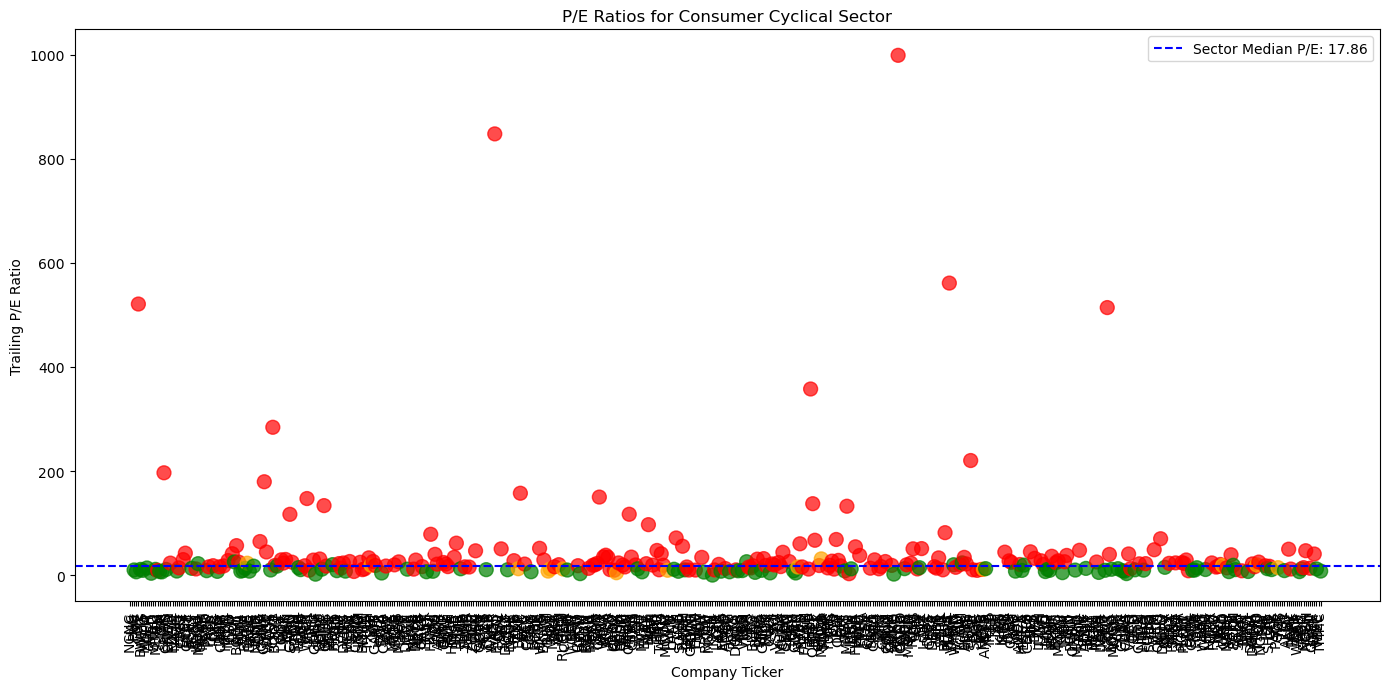

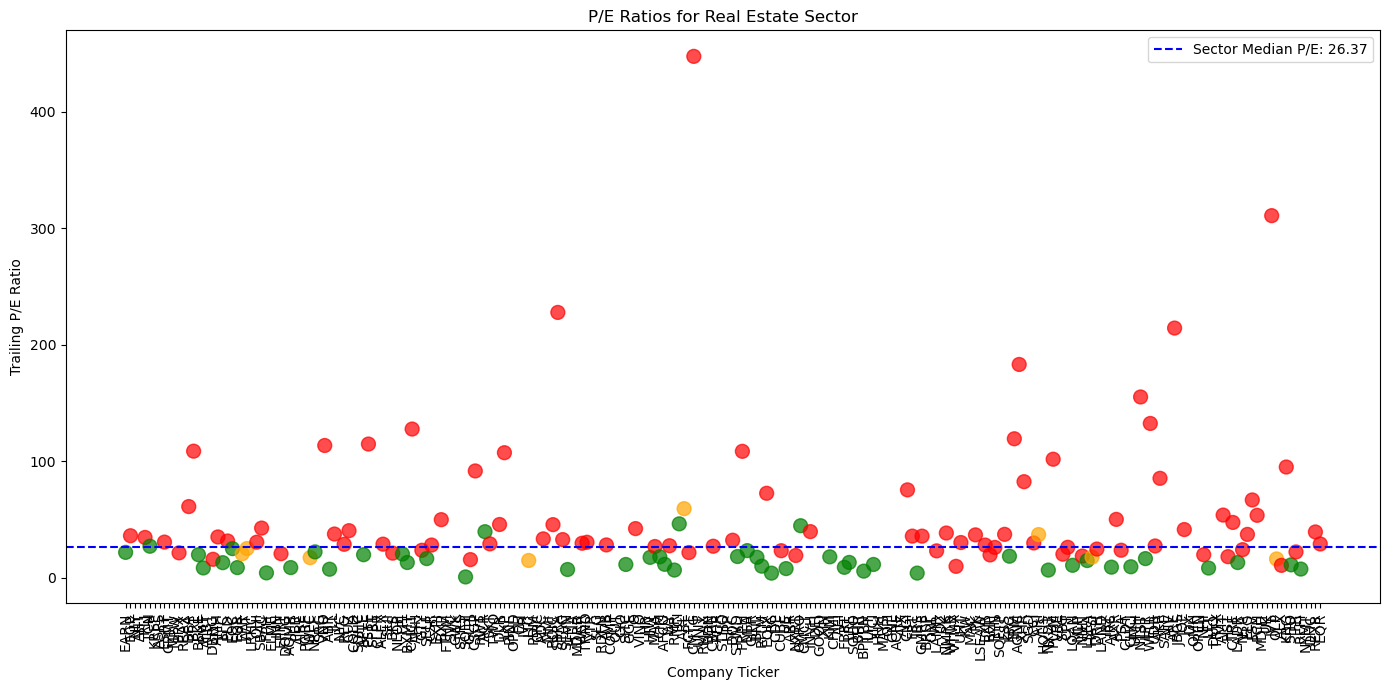

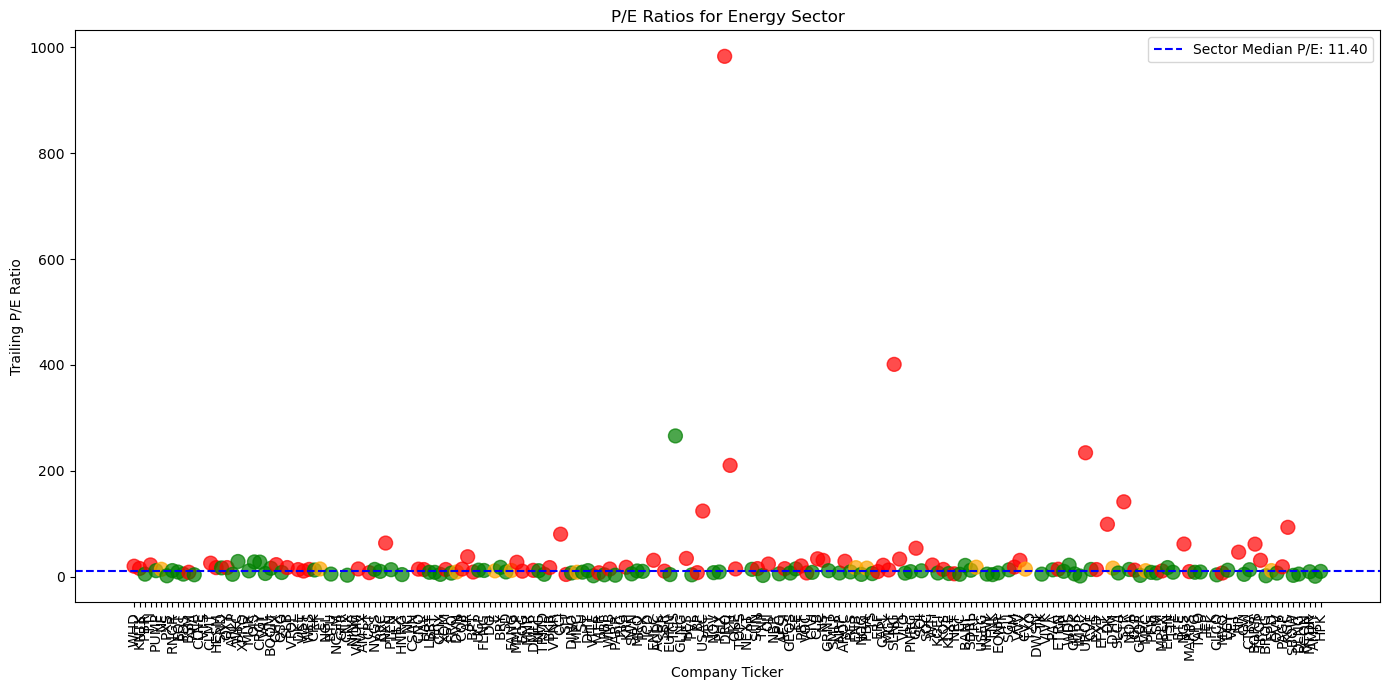

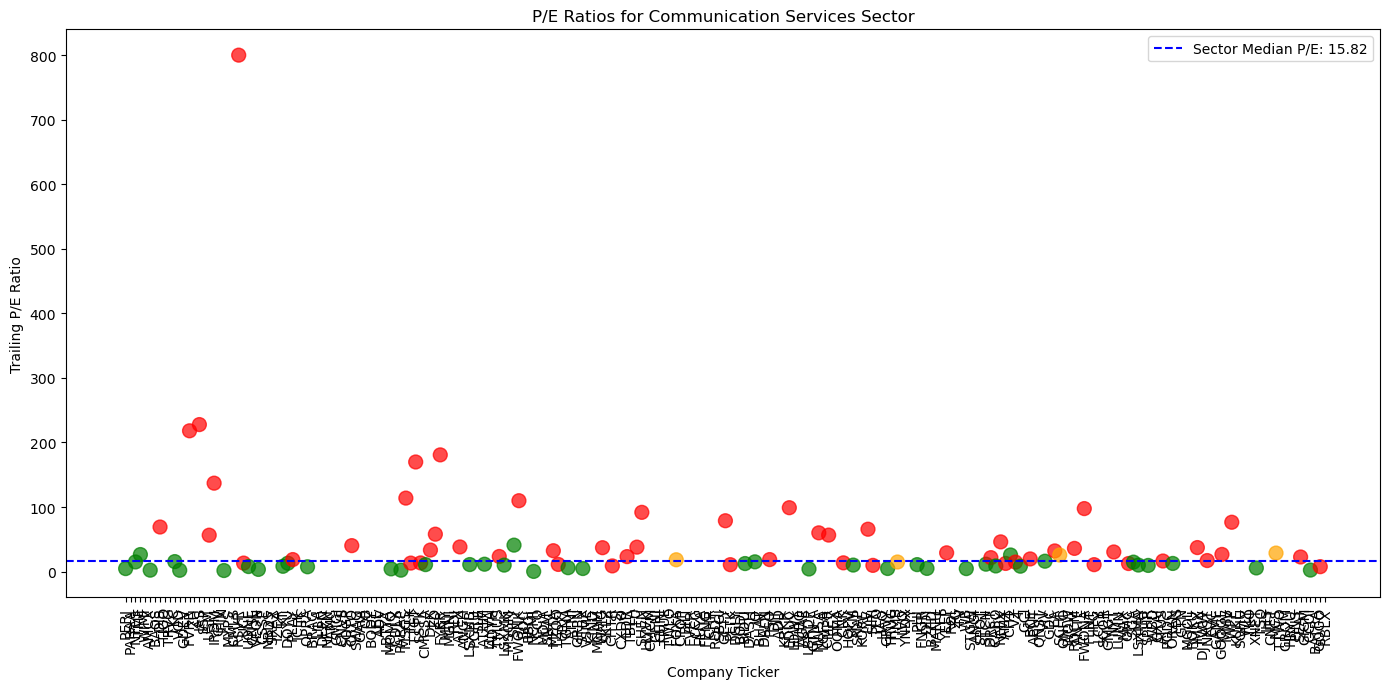

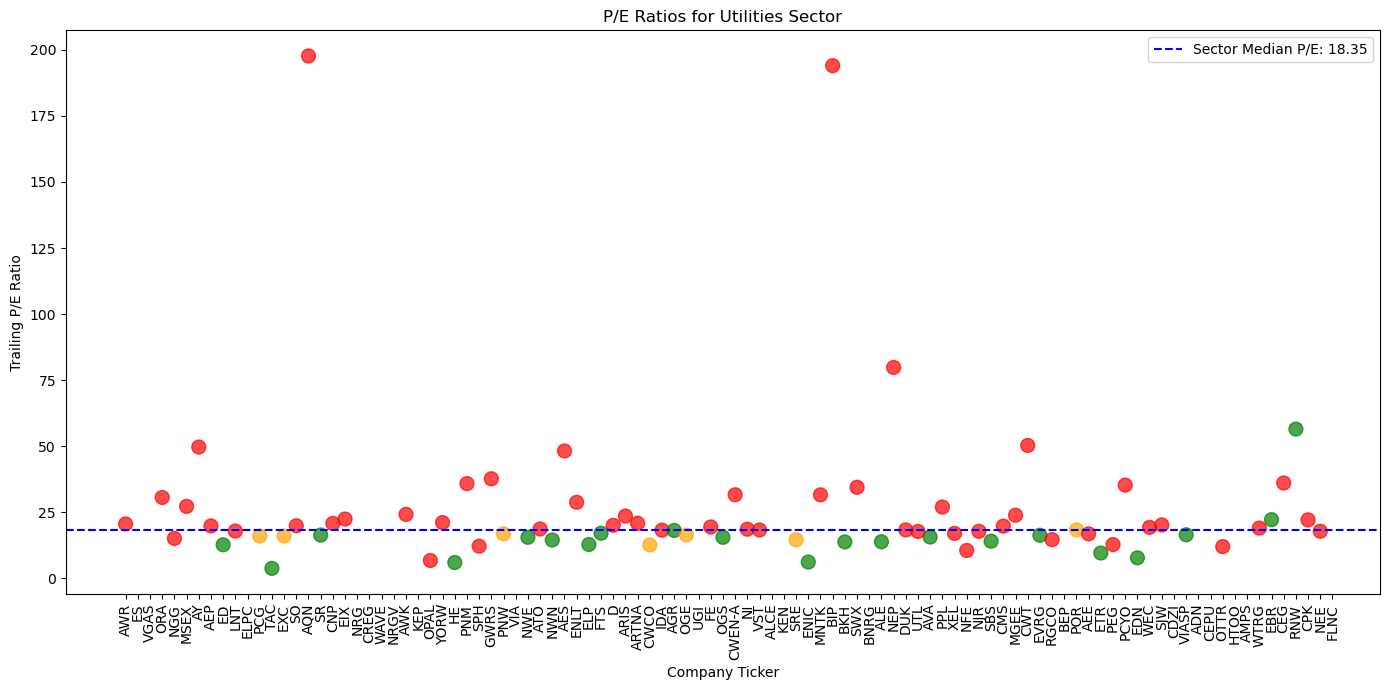

In [18]:
for sector in unique_sectors:
    df_sector_results = sector_results.get(sector, pd.DataFrame())
    plot_pe_ratios(df_sector_results, sector)

In [19]:
import numpy as np

def plot_pe_pb_with_marketcap(df):
    # Ensure Market Cap is in a suitable scale (e.g., billions) and convert to a size for the plot
    df['MarketCap_Billions'] = df['Market Cap'] / 1e9
    sizes = df['MarketCap_Billions'] * 10  # Scale market cap sizes for visibility

    # Create the scatter plot
    plt.figure(figsize=(14, 8))
    plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')
    
    # Loop through the DataFrame and add ticker symbols as text labels for each bubble
    for i, row in df.iterrows():
        # Check if both PB_Ratio and Trailing P/E are finite numbers
        if np.isfinite(row['P/B Ratio']) and np.isfinite(row['Trailing P/E']):
            plt.text(row['P/B Ratio'], row['Trailing P/E'], row['Ticker'], 
                     ha='center', va='center', fontsize=8, color='black', alpha=0.7)
    
    plt.title('P/B Ratio vs. Trailing P/E with Market Cap Size Indicator')
    plt.xlabel('P/B Ratio')
    plt.ylabel('Trailing P/E Ratio')
    plt.xscale('log')  # Using log scale for P/B Ratio if wide range values are expected
    plt.yscale('log')  # Using log scale for P/E Ratio to handle wide range of values and outliers

    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [20]:
'''
******
Use this if you want to plot all the data in one figure, but it gets quite messy
******

# Initialize an empty DataFrame
all_sectors_df = pd.DataFrame()

for sector, df in sector_results_dict.items():
    # Optionally, add a sector column to each sector's DataFrame before concatenation
    df['Sector'] = sector
    # Concatenate the current sector's DataFrame to the comprehensive DataFrame
    all_sectors_df = pd.concat([all_sectors_df, df], ignore_index=True)
'''

"\n******\nUse this if you want to plot all the data in one figure, but it gets quite messy\n******\n\n# Initialize an empty DataFrame\nall_sectors_df = pd.DataFrame()\n\nfor sector, df in sector_results_dict.items():\n    # Optionally, add a sector column to each sector's DataFrame before concatenation\n    df['Sector'] = sector\n    # Concatenate the current sector's DataFrame to the comprehensive DataFrame\n    all_sectors_df = pd.concat([all_sectors_df, df], ignore_index=True)\n"

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


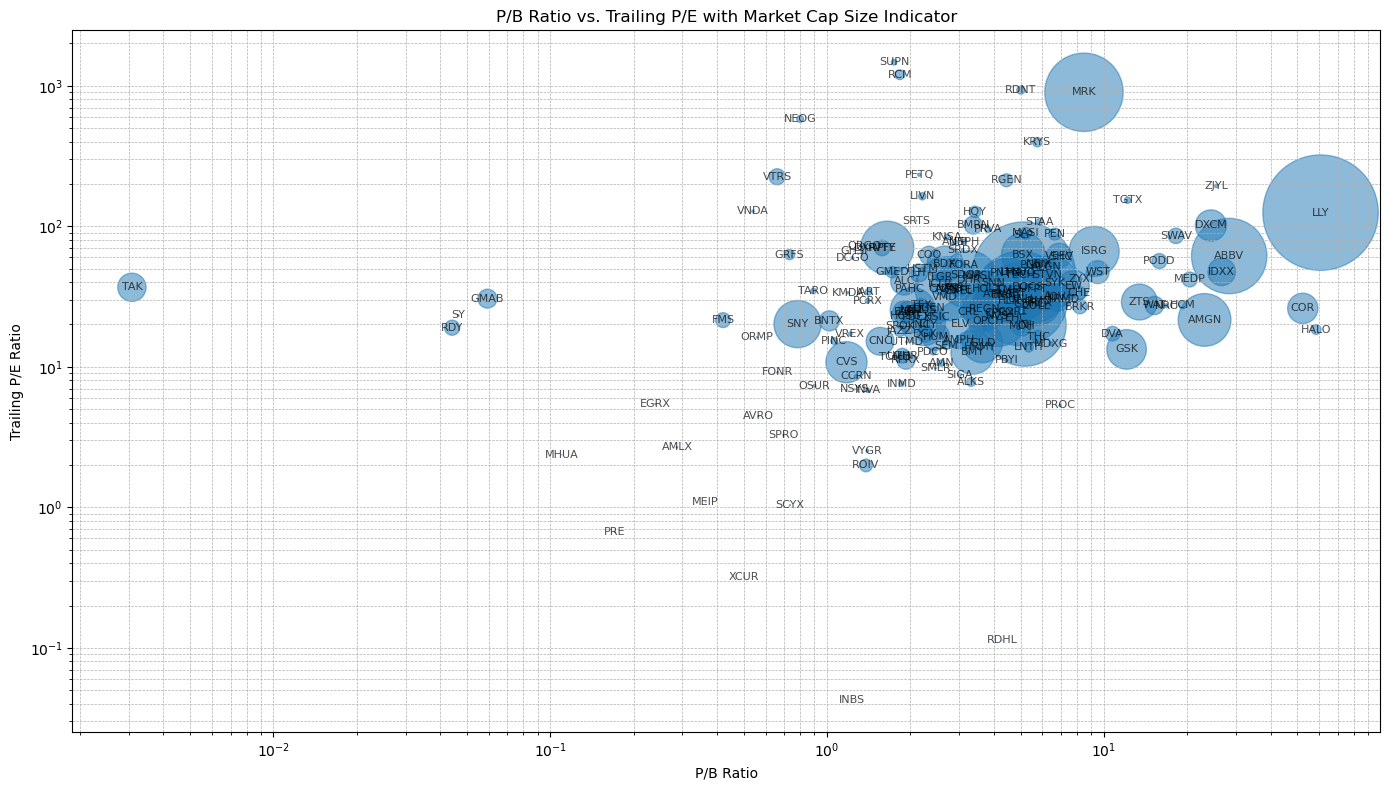

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


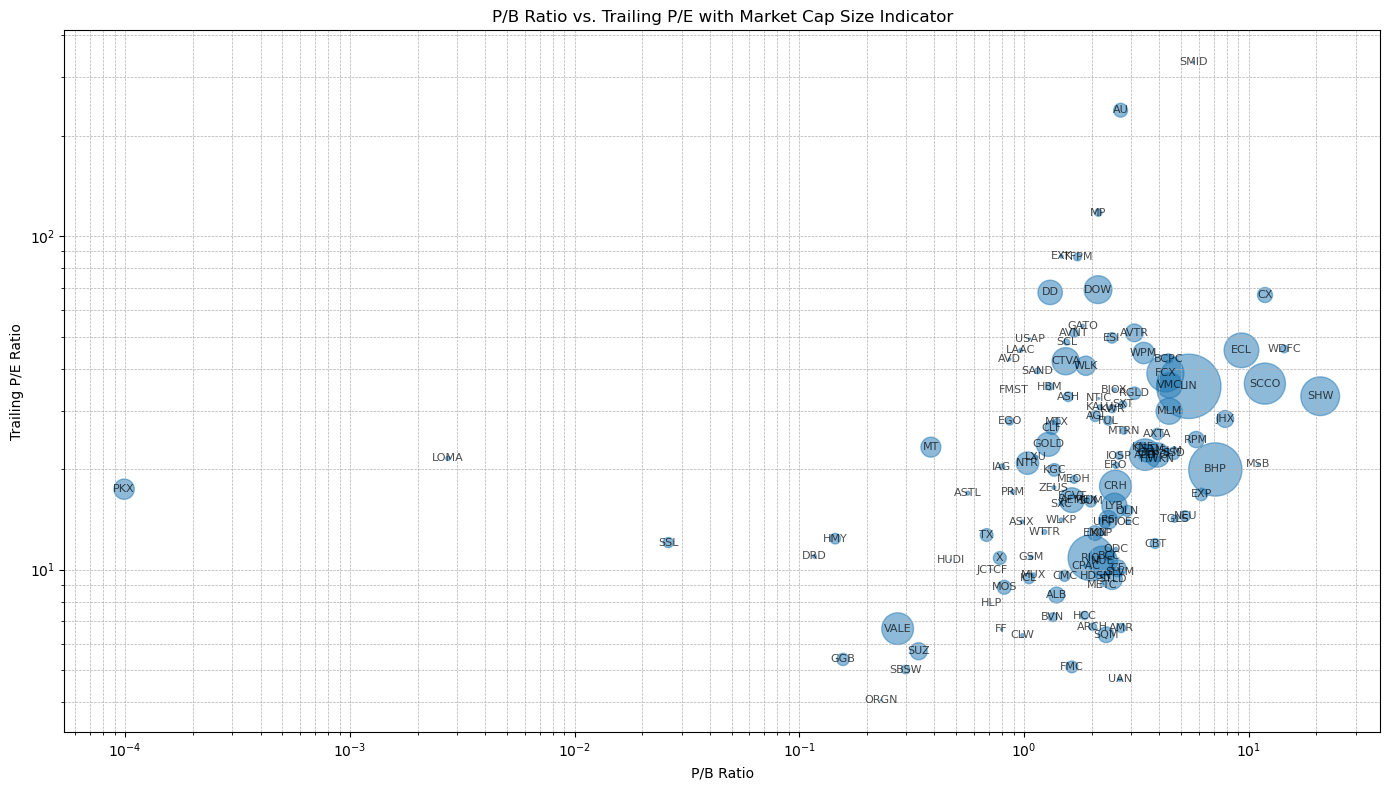

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


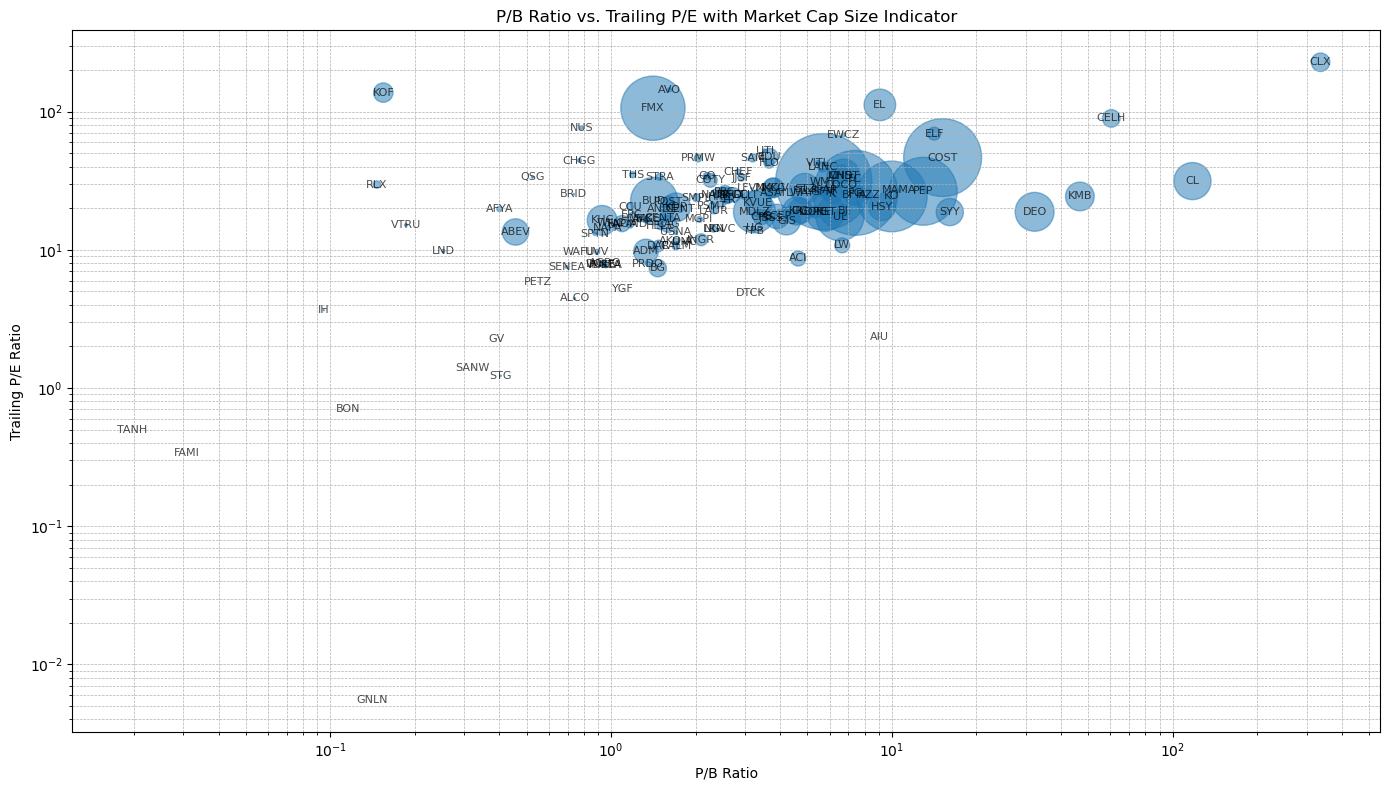

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


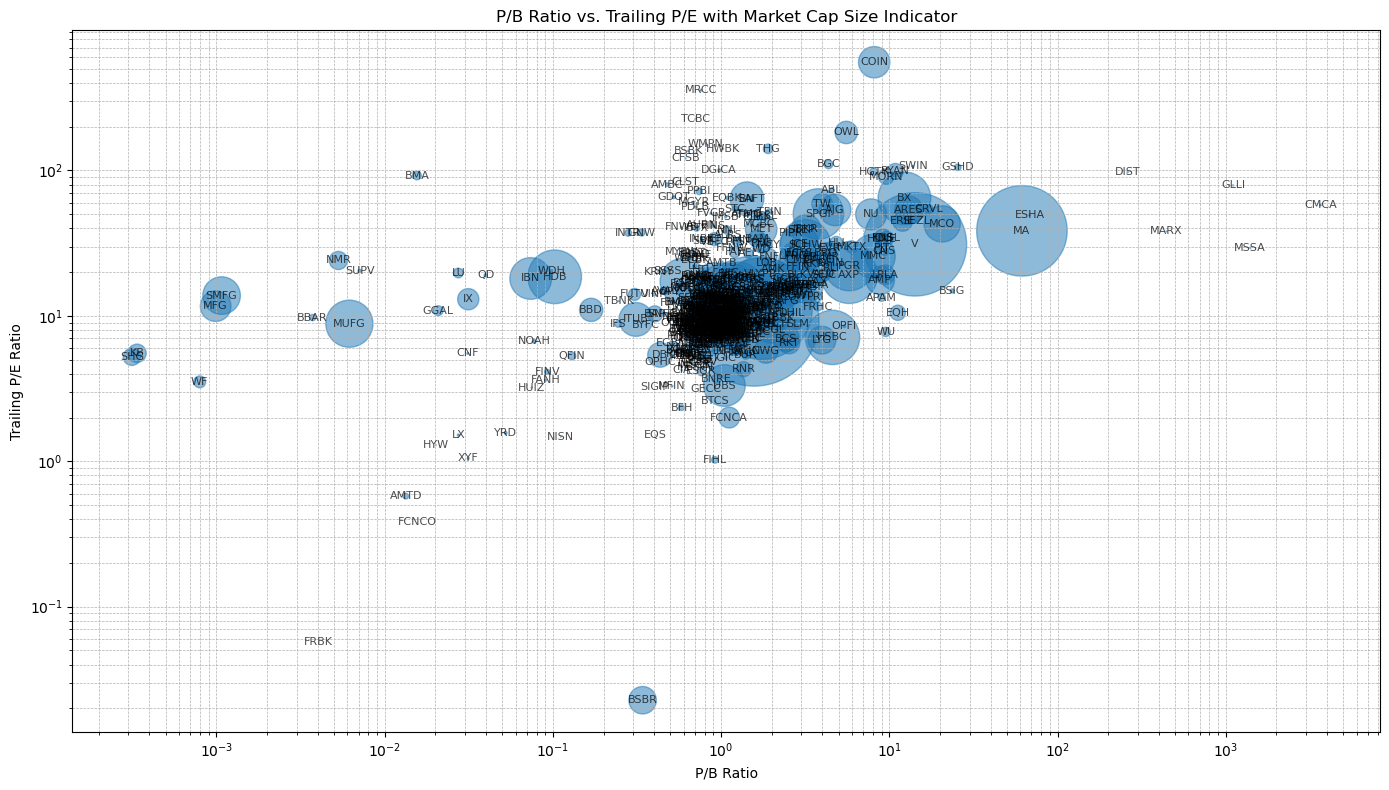

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


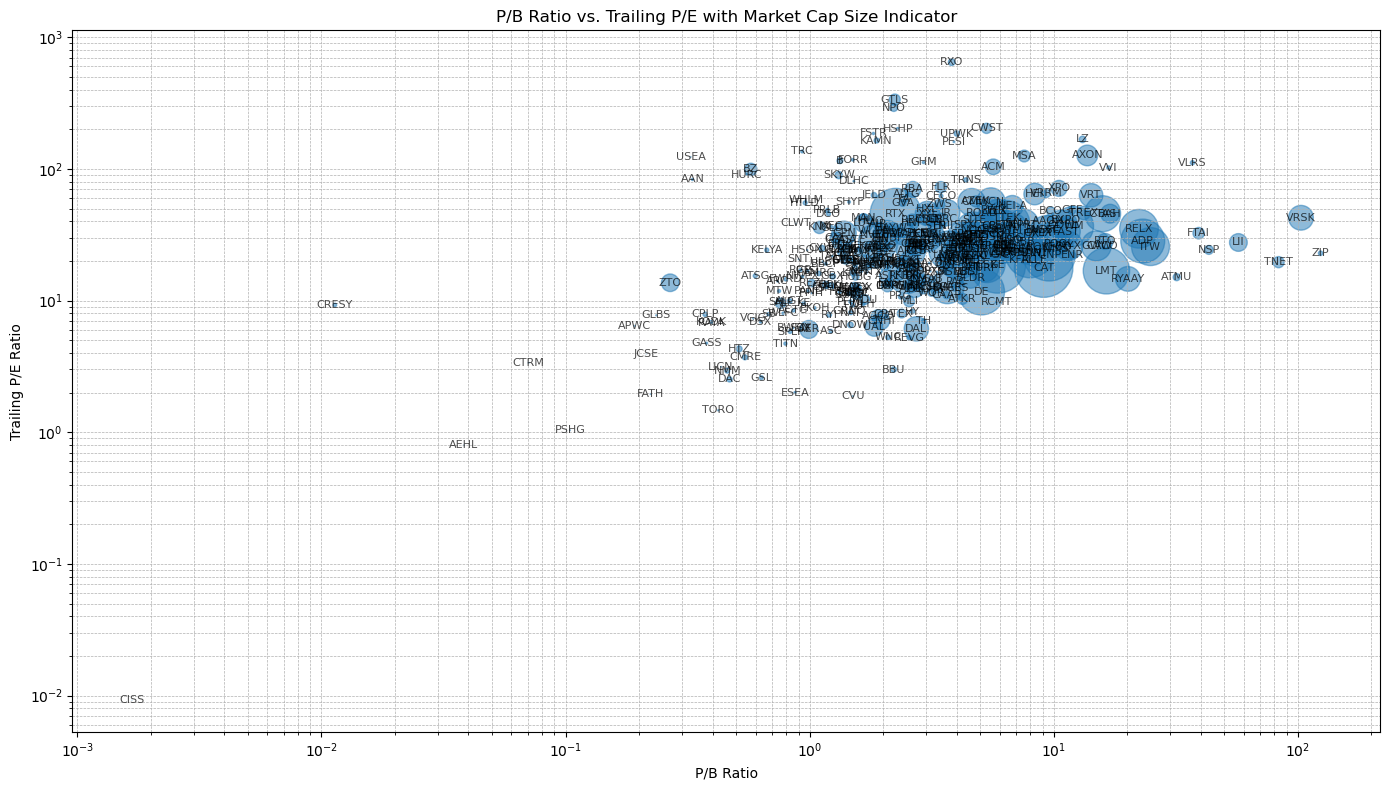

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


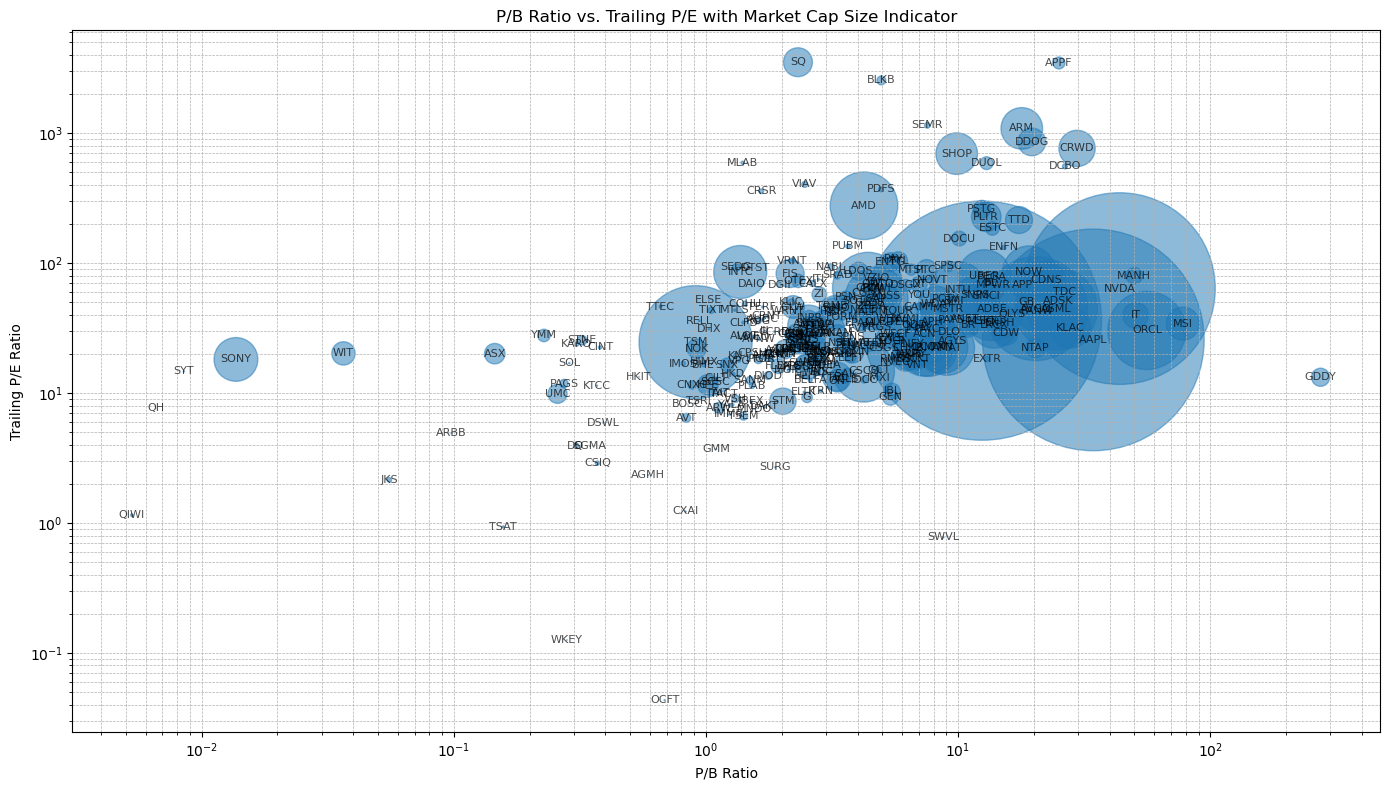

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


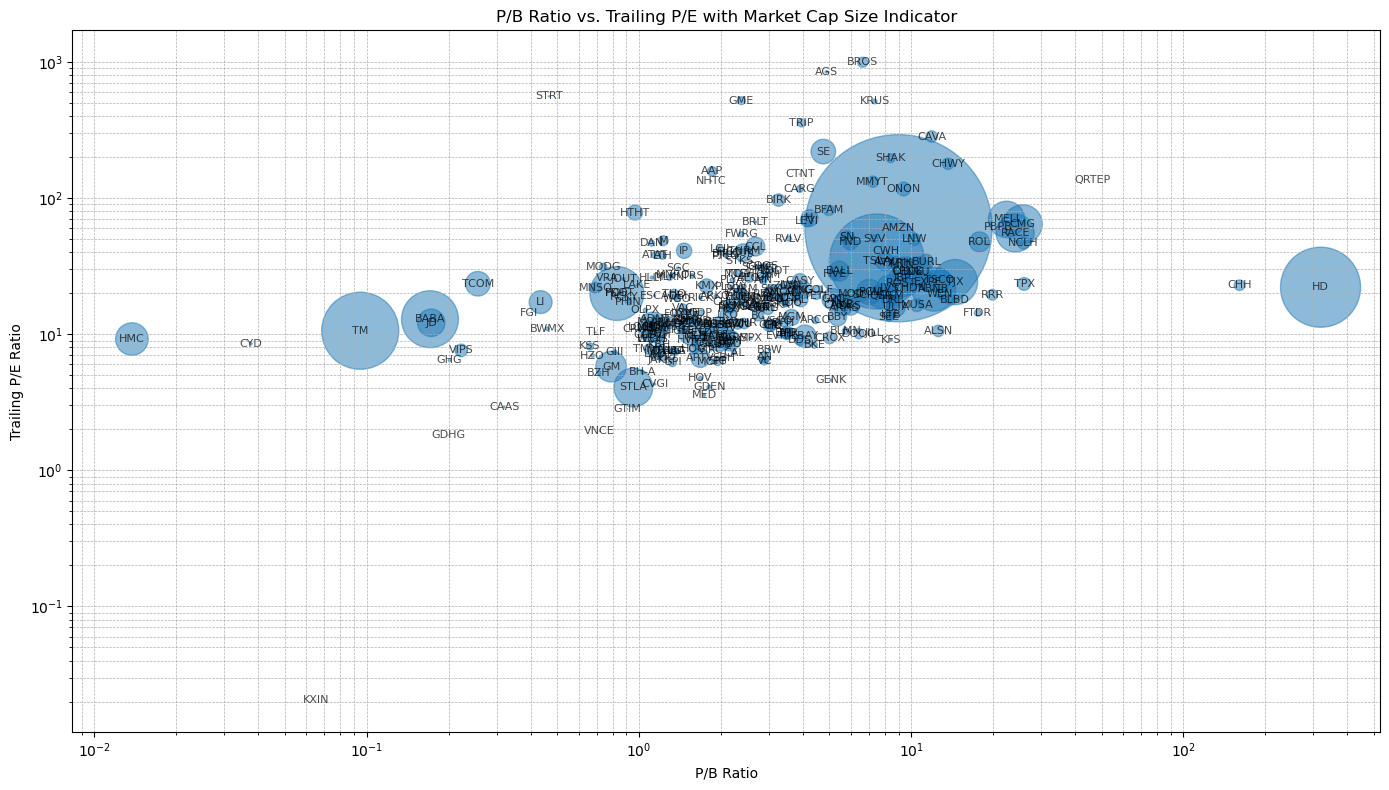

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


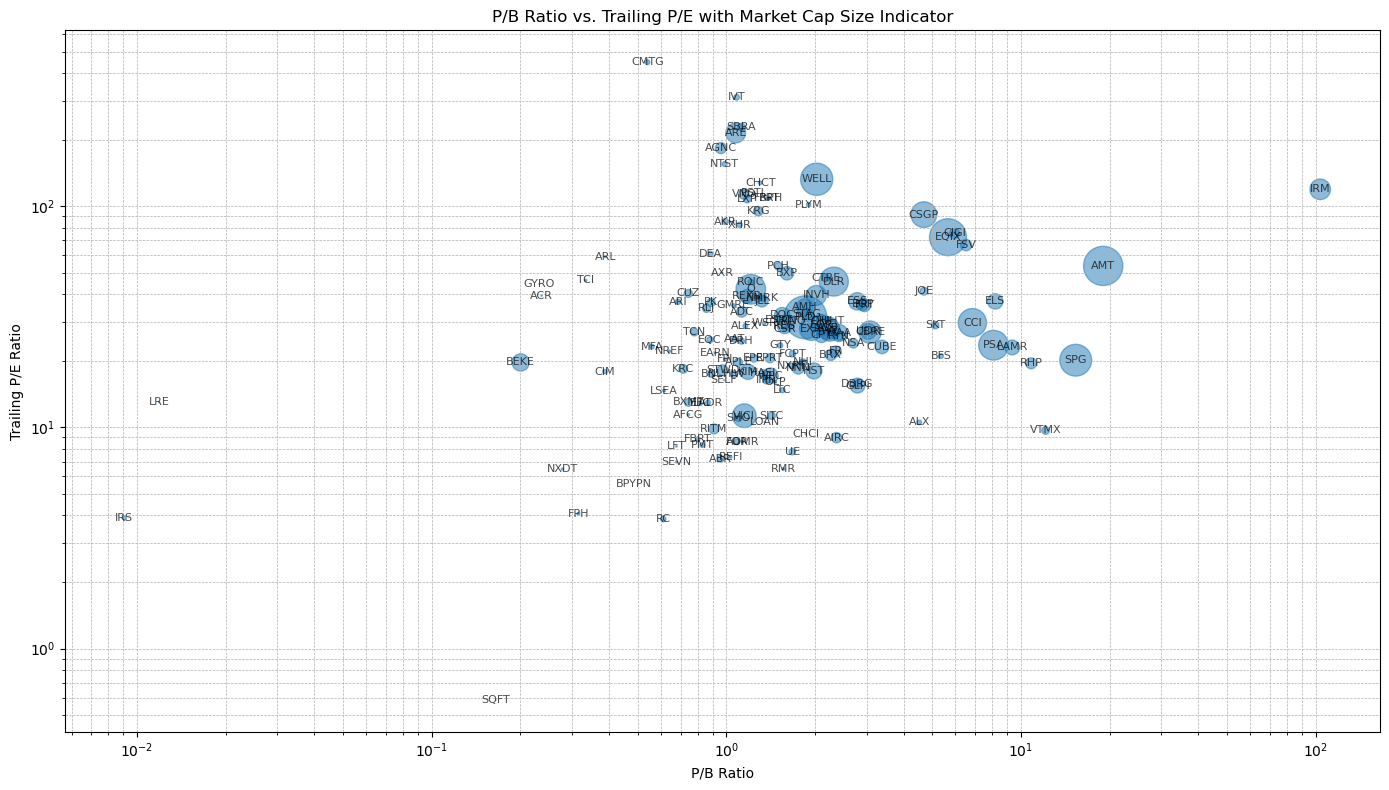

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


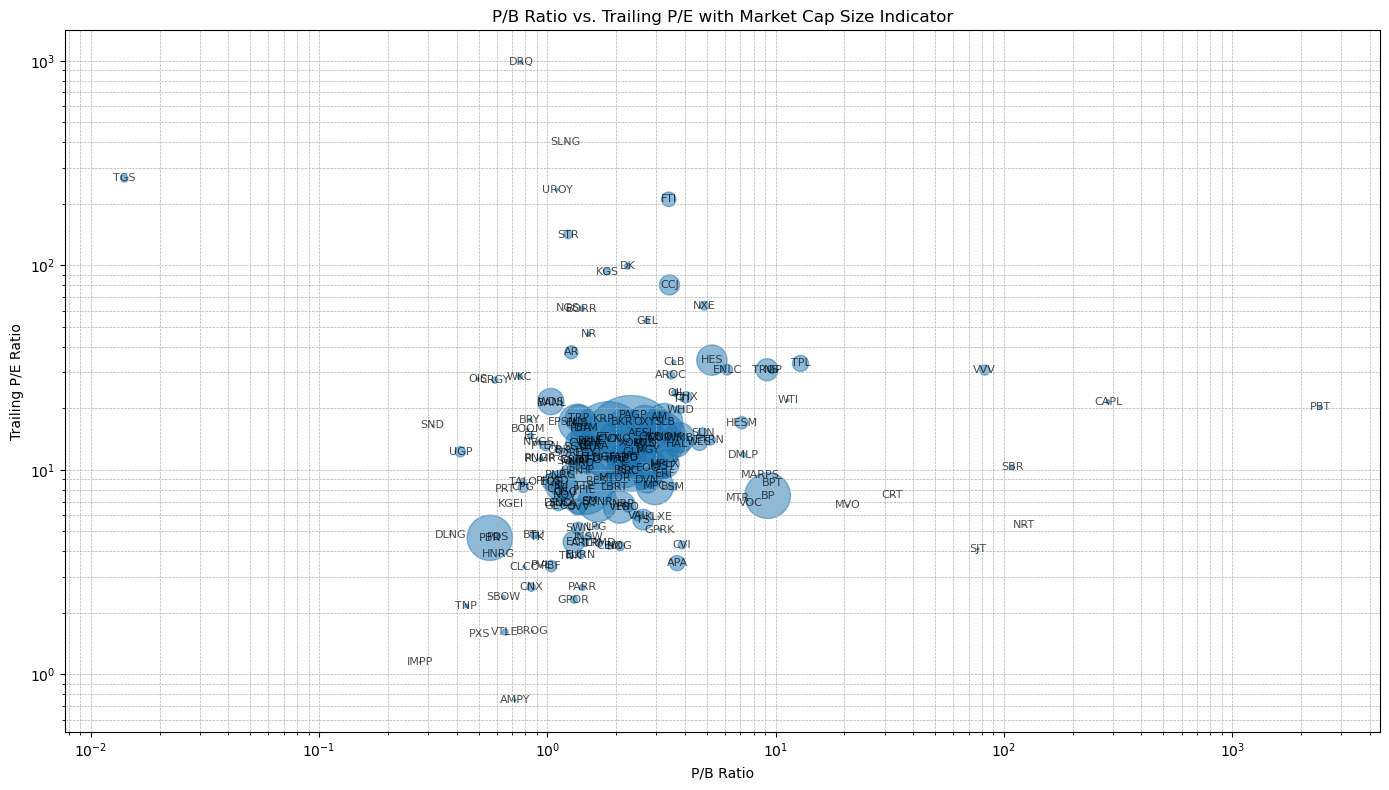

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


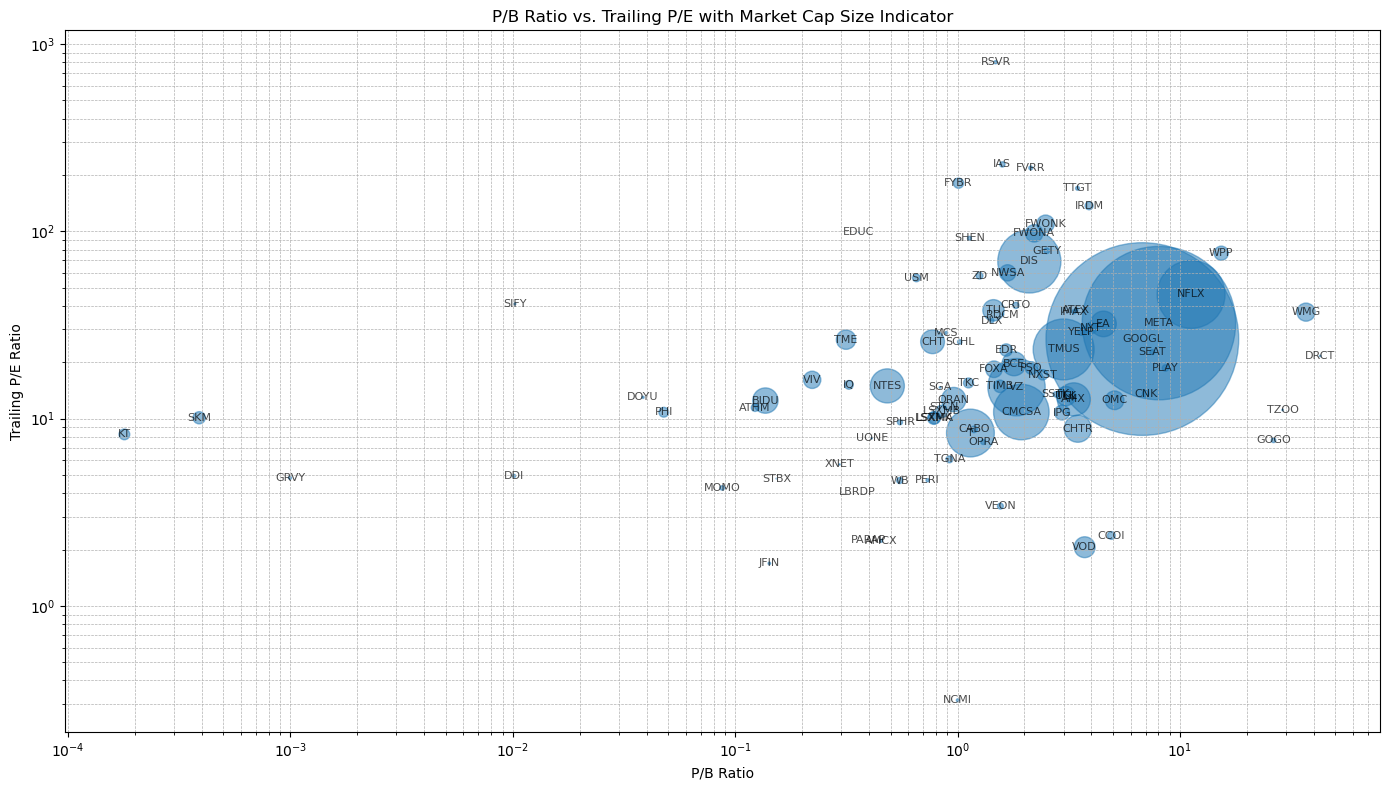

/var/folders/42/2w7j46nn3j75crpy2kc1y7vw0000gn/T/ipykernel_53159/3310547918.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['P/B Ratio'], df['Trailing P/E'], s=sizes, alpha=0.5, cmap='viridis')


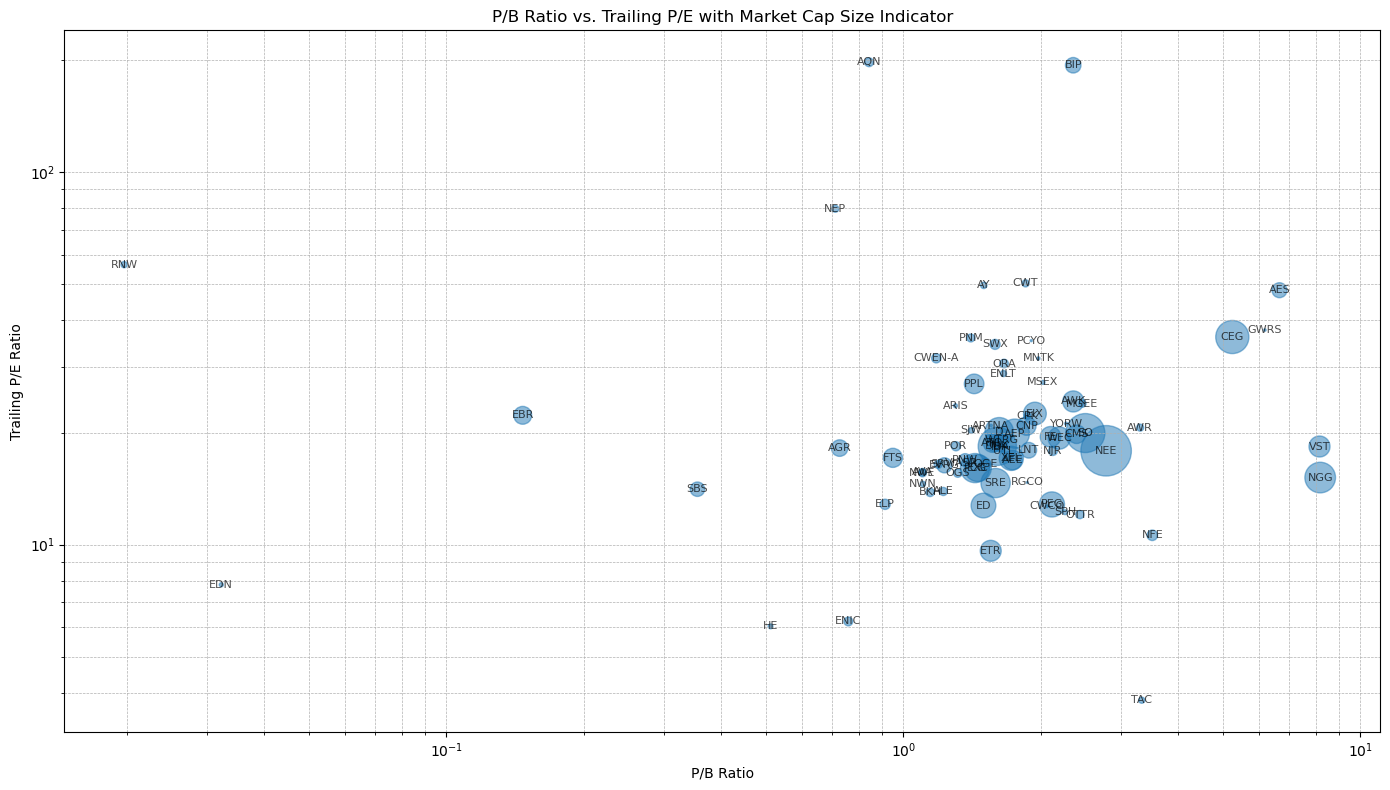

In [21]:
for sector in unique_sectors:
    plot_pe_pb_with_marketcap(sector_results[sector])